## Jasmine Ng (JCN66)

In [192]:
import Pkg; Pkg.add("StatsPlots")
using Statistics, LinearAlgebra, Random, DataFrames, Plots, StatsPlots, CSV

 Resolving package versions...
  Updating `~/.julia/Project.toml`
 [no changes]
  Updating `~/.julia/Manifest.toml`
 [no changes]


In [193]:
# load data
tax = CSV.read("incomeTaxData.csv")

,Year,County,IncomeClass,Disclosure,ReturnCount,TotalIncome,TotalDeductions,TotalExemptions,TotalTaxableIncome,TotalTaxBeforeCredits,TotalTaxLiability,Place of Residence Sort Order,Income Class Sort Order
,Int64⍰,String⍰,String⍰,String⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰
1,2011,Hamilton,"500,000 and over",d/,missing,missing,missing,missing,missing,missing,missing,26,13
2,2003,Dutchess,"100,000 - 199,999",missing,12738,1668991,261775,16628,1390589,91652,87689,19,10
3,2001,Ontario,Total,missing,44898,1829734,449962,25393,1354378,77454,72764,38,12
4,2012,New York City - Richmond,"30,000 - 39,999",missing,16086,559918,192402,10519,356997,17286,12238,5,5
5,2007,Clinton,"50,000 - 59,999",missing,2197,120482,29429,1649,89404,4738,4220,15,7
6,1999,Saratoga,Total,missing,88920,3969074,883753,51293,3034030,175973,169908,47,12
7,2010,Onondaga,"60,000 - 74,999",missing,13837,928570,195635,11010,721925,40503,37426,37,8
8,2008,Ulster,"40,000 - 49,999",missing,5971,266988,77044,3435,186509,9728,8672,57,6
9,2005,Clinton,Total,missing,33634,1284580,332270,17436,934774,53837,44740,15,12


You can see just from the first line of the dataset that the there are some rows with no returns associated with it. Let's delete those from the dataset.

Also note that all of the data is in thousands of dollars.

In [194]:
# clean data
tax = tax[.!(ismissing.(tax[:,:ReturnCount])), :];
# tax = tax[:,strip.(tax[:County])]
sort(tax, cols = :Year)

# create new columns
tax[:avg_tax] = tax[:,:TotalTaxLiability]./tax[:,:ReturnCount];

# a)

Plot the number of returns in Tompkins County over time.
（you should draw the plot for each income class and ignore the rows with the class of 'Total'.）


In [195]:
nototal = tax[tax[:IncomeClass] .!= "Total", :]
@df nototal scatter(:Year,:ReturnCount, group=:IncomeClass, title="Number of returns in Tompkins County over time",xlabel="Year",ylabel="Returns")



Plot the average income tax per return in Tompkins County (disregarding income tax).
（you could add up the all income classes (except 'Total') to calculate the weighted average tax OR just plot the rows of 'Total'. The added up number might be different with the number in 'total', and it should be fine.）

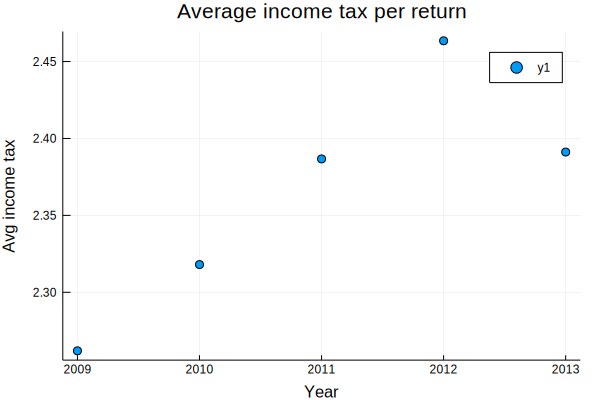

In [196]:
tompkins = tax[tax[:County].=="Tompkins",:]
tompkins = tompkins[tompkins[:IncomeClass] .== "Total", :]

@df tompkins scatter(:Year,:avg_tax, title="Average income tax per return",xlabel="Year",ylabel="Avg income tax")


What kind of plot did you choose to make? Why?

I use scatter plot because I want to show the average income tax per return across all income classes in Tompkins over time. So my x-axis is year, and the y-axis is the average income tax per return across all income classes in Tompkins over time.

# b)

Continuing to look only at Tompkins County, fit a model that predicts avg_tax using the year number. Do this with least squares.

In [197]:
n = size(tompkins,1)

5

In [198]:
X1 = [tompkins.Year ones(n)]
y1 = tompkins.avg_tax
w1 = X1\y1

2-element Array{Float64,1}:
   0.04039017960288423
 -78.86038892134754   

In [199]:
w1

2-element Array{Float64,1}:
   0.04039017960288423
 -78.86038892134754   

In [200]:
tompkins[:pred_linear] = X1*w1

5-element Array{Union{Missing, Float64},1}:
 2.3238720804497603
 2.364262260052641 
 2.28348190084688  
 2.4046524396555355
 2.445042619258416 

Transform the input to include an offset term in the model

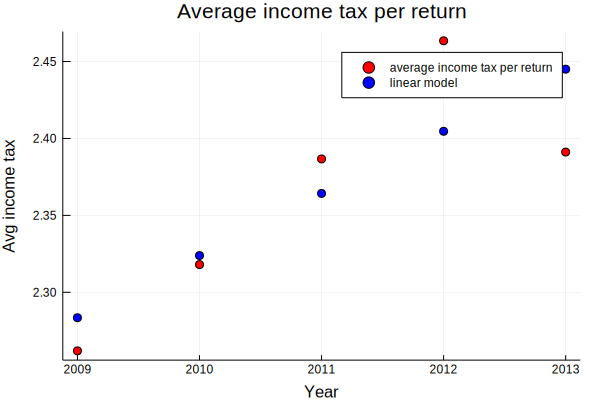

In [201]:
@df tompkins scatter(:Year,:avg_tax, color=:red, label="average income tax per return", title="Average income tax per return",xlabel="Year",ylabel="Avg income tax")
@df tompkins scatter!(:Year,:pred_linear,color=:blue, label="linear model", title="Average income tax per return",xlabel="Year",ylabel="Avg income tax")

# c)

Now we will change the feature space.
Fit a model using the year and the avg_tax from the previous year.

In [202]:
X2 = [tompkins.Year[1:end-1] tompkins.avg_tax[2:end] ones(n-1)]
y2 = tompkins.avg_tax[1:end-1]
w2 = X2\y2
tompkins[:pred_ar1_lin] = vcat(X2*w2, tompkins.pred_linear[end]);

In [203]:
#wc
w2

3-element Array{Float64,1}:
    0.06958248874948755
    0.06591713630206009
 -137.69466402788572   

In [204]:
tompkins

,Year,County,IncomeClass,Disclosure,ReturnCount,TotalIncome,TotalDeductions,TotalExemptions,TotalTaxableIncome,TotalTaxBeforeCredits,TotalTaxLiability,Place of Residence Sort Order,Income Class Sort Order,avg_tax,pred_linear,pred_ar1_lin
,Int64⍰,String⍰,String⍰,String⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Float64,Float64⍰,Float64⍰
1,2010,Tompkins,Total,missing,38592,1997547,428866,17022,1579081,100624,89457,56,14,2.31802,2.32387,2.32346
2,2011,Tompkins,Total,missing,38925,2048433,427949,16928,1626582,104074,92902,56,14,2.38669,2.36426,2.38482
3,2009,Tompkins,Total,missing,38126,1943387,420576,17310,1528105,96498,86239,56,14,2.26195,2.28348,2.25894
4,2012,Tompkins,Total,missing,38523,2133786,424416,16688,1718760,104756,94901,56,14,2.46349,2.40465,2.46292
5,2013,Tompkins,Total,missing,38475,2135707,430135,16244,1708936,103063,92000,56,14,2.39116,2.44504,2.44504


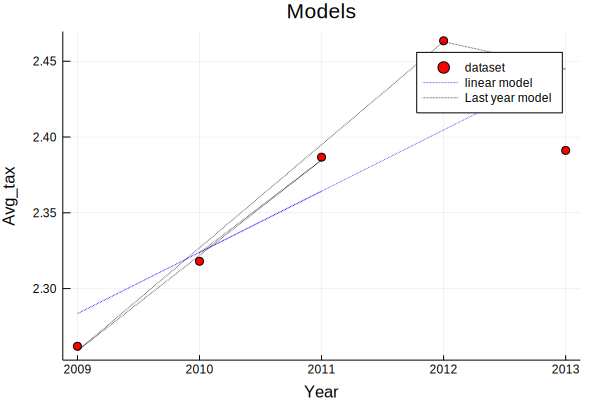

In [205]:
@df tompkins scatter(:Year,:avg_tax, color=:red, label="dataset",title="Models")
plot!(tompkins.Year, tompkins.pred_linear, color=:blue, linestyle=:dot, label="linear model")
plot!(tompkins.Year, tompkins.pred_ar1_lin, color=:black, linestyle=:dot, label="Last year model")
xlabel!("Year")
ylabel!("Avg_tax")



Interpret the coefficients of this. What do they mean?

Plot the real average tax return per year against your model's prediction. Discuss how you think your model fits.

My model fits better than the one in part b and hits almost all the datapoints in the Tompkins dataset. 

When predicting the avg_tax with year and average income tax from last
year, the average income tax is predicted by avg_tax = 0.06958248874948755year + 0.06591713630206009avg_taxlastyear-137.69466402788572.

So the coefficients w =(0.06958248874948755,0.06591713630206009,−137.69466402788572). The coefficient w means that both year and average income tax last year have
positive effect on average income tax this year. If the year increments by 1, the average income tax can increases by 0.06958248874948755, and when the average
income tax from last year increases 1 unit, the average income tax this year can by 
increase 0.06591713630206009 units.

# d)

Add two new features to your model. This could be a column of the data, a transformation of a column, or a new column formed from another. The only requirement is that the prediction in year $t$ be based on data avilable by the end of year $t-1$

Fit this model and interpret the coefficients. 

In [206]:
# First feature being added is on totaltaxliability previous year
X5 = [tompkins.Year[1:end-1] tompkins.avg_tax[2:end] tompkins.TotalExemptions[1:end-1]  ones(n-1)]
y5 = tompkins.avg_tax[1:end-1]
w5 = X5\y5
tompkins[:pred_addexemp] = vcat(X5*w5, tompkins.pred_linear[end]);

In [207]:
w5

4-element Array{Float64,1}:
    0.0867371997499748  
    0.0808126221880469  
    8.492702384261067e-5
 -173.6622548864245     

In [208]:
# Second feature is on totaltaxableincome and avg tax previous year
X6 = [tompkins.Year[1:end-1] tompkins.avg_tax[2:end] tompkins.TotalExemptions[1:end-1] tompkins.TotalTaxableIncome[1:end-1] ones(n-1)]
y6 = tompkins.avg_tax[1:end-1]
w6 = X6\y6

tompkins[:pred_addTotalTaxableIncome] = vcat(X6*w6, tompkins.pred_linear[end]);

In [209]:
#wd
w6

5-element Array{Float64,1}:
 -1.6384878170309736e-5 
 -0.14434188153082986   
  5.016972001279586e-5  
  1.1662800856395707e-6 
 -0.00018714878171071728

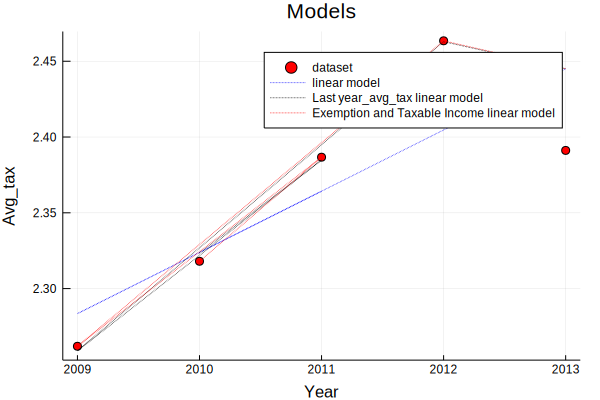

In [210]:
@df tompkins scatter(:Year,:avg_tax, color=:red, label="dataset",title="Models")
plot!(tompkins.Year, tompkins.pred_linear, color=:blue, linestyle=:dot, label="linear model")
plot!(tompkins.Year, tompkins.pred_ar1_lin, color=:black, linestyle=:dot, label="Last year_avg_tax linear model")
# plot!(tompkins.Year, tompkins.pred_addexemp, color=:brown, linestyle=:dot, label="exemption linear model")
plot!(tompkins.Year, tompkins.pred_addTotalTaxableIncome, color=:red, linestyle=:dot, label="Exemption and Taxable Income linear model")
xlabel!("Year")
ylabel!("Avg_tax")

In [211]:
tompkins

,Year,County,IncomeClass,Disclosure,ReturnCount,TotalIncome,TotalDeductions,TotalExemptions,TotalTaxableIncome,TotalTaxBeforeCredits,TotalTaxLiability,Place of Residence Sort Order,Income Class Sort Order,avg_tax,pred_linear,pred_ar1_lin,pred_addexemp,pred_addTotalTaxableIncome
,Int64⍰,String⍰,String⍰,String⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Float64,Float64⍰,Float64⍰,Float64⍰,Float64⍰
1,2010,Tompkins,Total,missing,38592,1997547,428866,17022,1579081,100624,89457,56,14,2.31802,2.32387,2.32346,2.31802,2.31802
2,2011,Tompkins,Total,missing,38925,2048433,427949,16928,1626582,104074,92902,56,14,2.38669,2.36426,2.38482,2.38669,2.38669
3,2009,Tompkins,Total,missing,38126,1943387,420576,17310,1528105,96498,86239,56,14,2.26195,2.28348,2.25894,2.26195,2.26195
4,2012,Tompkins,Total,missing,38523,2133786,424416,16688,1718760,104756,94901,56,14,2.46349,2.40465,2.46292,2.46349,2.46349
5,2013,Tompkins,Total,missing,38475,2135707,430135,16244,1708936,103063,92000,56,14,2.39116,2.44504,2.44504,2.44504,2.44504


My two new features are Total Exemptions from last year and Total Taxable
Income from last year.I include the two new features because I think the proportion of tax exemptions across income class might affect the average income tax in total. Higher numbers of tax exemption may lead to a lower average of income tax. Also the Total Taxable Income from last year might also affect the average income tax in total. I predict that if the total taxable income from last year rises then the average income tax of this year may also rise. My new feature space with these two features comprise of the year and the avg_tax from the previous year. When predicting the avg_tax with this feature space, avg_tax =  -1.6384878170309736e-5Year(previous year) -0.14434188153082986Avg_tax(previous year) + 5.016972001279586e-5TotalExemptions(previousyear) + 1.1662800856395707e-6TotalTaxableIncome(previous year)-0.00018714878171071728. The coefficients of w^d is [ -1.6384878170309736e-5, 
 -0.14434188153082986,   5.016972001279586e-5 , 1.1662800856395707e-6 ,-0.00018714878171071728]. 

Looking at the sign of the coefficients, the previous year and the avg_tax from the previous year have a negative effect on anv_tax this year. Though the previous year and the totalexemption, and the totaltaxableincome do not seem to affect the avg_tax this year as heavily since the coefficients are so small. The positive signs of the corresponding coefficients indicate that totalexemptions and totaltaxableincome have a positive effect on the avg_tax this year.

# e)

Compare the coefficients from part b and c. Does the coefficient of avg_tax differ in the two models? If so, how do you interpret this difference?

Since the coefficients of avg_tax from wc and question wd do have differences, it shows that there is a change and influence of adding two new features into the prediction model. The coefficient for avg_tax from last year in wd is -0.14434188153082986 and the coeff for avg_tax from last year in wc is 0.06591713630206009. The coefficients have different signs and have drastic difference in the scale of weights. The absolute value difference is 0.21025901783288994. This is a pretty drastic difference. You can tell that wd has updated my model to include two features and the covariate avg_tax from last year will play a different weight than it did in wc with two new features added. 

In [213]:
( 0.06591713630206009+0.14434188153082986)

0.21025901783288994

# f)

Now we want to see how this model performs in other counties. Apply the model you fit in part c, with coefficients $w^c$, to data from the other counties and compute the error of this model on each data set.

Plot a histogram of the mean errors the model makes.

In [215]:
#Mean error of Tompkins
s = sort!(tompkins)
X6 = [s.Year[1:end-1] s.avg_tax[2:end] s.TotalExemptions[1:end-1] s.TotalTaxableIncome[1:end-1] ones(n-1)]
y6 = s.avg_tax[1:end-1]
w = X6\y6
mean_t = norm(y6-X6*w)/length(X6[:,1])

2.220446049250313e-16

In [218]:
using DataFrames
#Cleaning dataset
clean_tax = tax[tax[:County] .!= "NYS Unclassified +", :]
clean_tax = clean_tax[clean_tax[:County] .!= "Residence Unknown ++", :]
clean_tax = clean_tax[clean_tax[:County] .!= "Grand Total", :]
clean_tax = clean_tax[clean_tax[:County] .!= "Full-Year Resident", :]


Tax = []
for i in Set(tax[:County])
    x = clean_tax[clean_tax[:County].==i,:]
    if length(x[x[:IncomeClass].=="Total",:][:Year])==5
        push!(Tax,x)
    end
end
length(Tax)

62

In [219]:
mean = []
for j = 1:length(Tax)
    s = Tax[j]
    X6 = [s[1][1:end-1] s[14][2:end] s[8][1:end-1] s[9][1:end-1] ones(size(s)[1]-1)]
    y6 = s[14][1:end-1]
    push!(mean,norm(y6-X6*w6)/length(X6[:,1]))
end

In [220]:
#just checking to see if w6 is still the same weight 
#vector as the one used for the Tompkins dataset
w6

5-element Array{Float64,1}:
 -1.6384878170309736e-5 
 -0.14434188153082986   
  5.016972001279586e-5  
  1.1662800856395707e-6 
 -0.00018714878171071728

In [223]:
mean

62-element Array{Any,1}:
 2.9027048033355176
 2.649216079473932 
 3.1256376952634644
 1.409615955249785 
 4.4980695381636115
 3.553058050584496 
 3.813058313792644 
 4.1780282068817005
 2.70895964279929  
 2.7402357986329395
 3.2707071216534773
 2.7114113056818363
 4.6263878380315235
 ⋮                 
 3.6428537376520964
 5.439144062526629 
 4.531165229752458 
 3.5279084170524695
 3.853721076275288 
 3.085074793264897 
 2.893440792632907 
 2.307172327676524 
 4.8556307102761584
 3.5915055413075128
 5.494950175160458 
 2.9447153263956554

In [224]:
Statistics.mean(mean)

3.3014093554531843

Are there major outliers?

In [225]:
outlier = []
for j = 1:length(Tax)
    s = Tax[j]
    X6 = [s[1][1:end-1] s[14][2:end] s[8][1:end-1] s[9][1:end-1] ones(size(s)[1]-1)]
    y6 = s[14][1:end-1]
    if norm(y6-X6*w6)/length(X6[:,1]) > 3
        push!(outlier,norm(y6-X6*w6)/length(X6[:,1]))
    end
end

In [226]:
outlier[:][:]

36-element Array{Any,1}:
 3.1256376952634644
 4.4980695381636115
 3.553058050584496 
 3.813058313792644 
 4.1780282068817005
 3.2707071216534773
 4.6263878380315235
 4.568937466853648 
 3.4592125693802043
 4.611964842763656 
 4.258674789693965 
 3.9982628180198563
 3.549040892667534 
 ⋮                 
 3.100296396754707 
 3.8584592548181313
 3.9224105646712997
 3.6428537376520964
 5.439144062526629 
 4.531165229752458 
 3.5279084170524695
 3.853721076275288 
 3.085074793264897 
 4.8556307102761584
 3.5915055413075128
 5.494950175160458 

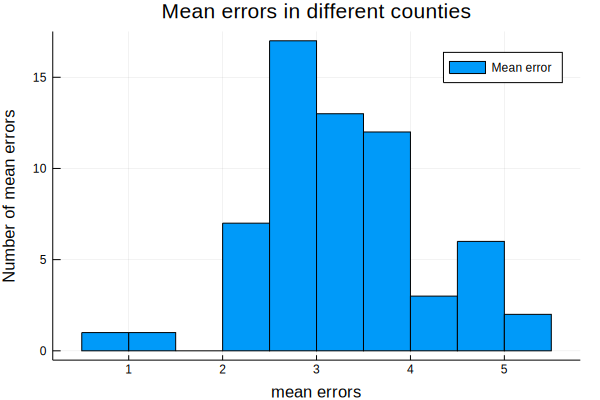

In [227]:
histogram(mean,xlabel= "mean errors", ylabel="Number of mean errors",title="Mean errors in different counties",label="Mean error")


Compared to the Tompkins data set, the model is not as accurate when it applies to other counties. For example, when it applies to Tompkins, the mean error is approximately 0, but when it applies to other counties, the mean errors are significantly higher just from briefly appearing at the array of mean errors. The average of the mean errors is 3.3014093554531843 which is significantly larger. I define counties that have mean error larger than 3 to be outliers. In this sense, there are 36 major outliers. For example, Otsego is one of the major outliers because the dataset has a mean errors greater than 3.

# g)

Using the same features you chose in part d, fit a model to the data for each of the other counties. These will be county-specific models. They may have different coefficient vectors from $w^d$.

Plot a histogram of the mean square errors of the county-specific models for their respective counties.

In [228]:
#Mean error of Tompkins
s = sort!(tompkins)
X6 = [s.Year[1:end-1] s.avg_tax[2:end] s.TotalExemptions[1:end-1] s.TotalTaxableIncome[1:end-1] ones(n-1)]
y6 = s.avg_tax[1:end-1]
w = X6\y6
mean_t = norm(y6-X6*w)/length(X6[:,1])

2.220446049250313e-16

In [229]:
using DataFrames
#Cleaning dataset
clean_tax = tax[tax[:County] .!= "NYS Unclassified +", :]
clean_tax = clean_tax[clean_tax[:County] .!= "Residence Unknown ++", :]
clean_tax = clean_tax[clean_tax[:County] .!= "Grand Total", :]
clean_tax = clean_tax[clean_tax[:County] .!= "Full-Year Resident", :]


Tax = []
for i in Set(tax[:County])
    x = clean_tax[clean_tax[:County].==i,:]
    if length(x[x[:IncomeClass].=="Total",:][:Year])==5
        push!(Tax,x)
    end
end
length(Tax)

62

In [230]:
mean = []
for j = 1:length(Tax)
    s = Tax[j]
    X6 = [s[1][1:end-1] s[14][2:end] s[8][1:end-1] s[9][1:end-1] ones(size(s)[1]-1)]
    y6 = s[14][1:end-1]
    w = X6\y6
    push!(mean,norm(y6-X6*w)/length(X6[:,1]))
end
    

In [231]:
mean

62-element Array{Any,1}:
 2.2817246614039965
 1.5794199262871718
 2.2176586684720414
 1.1087459569613998
 3.3647651760076753
 2.886177690718248 
 1.243232476227944 
 3.358444329332318 
 1.9767367513074063
 1.2660184107482575
 2.5116618141445377
 2.2548656622750562
 3.668869212582863 
 ⋮                 
 2.0378970227320496
 3.6856682920555732
 1.6447238456636073
 2.50167566452113  
 2.0310924373902015
 1.8892261150979082
 1.9415701175072342
 1.8345058887531456
 3.4651979698681408
 2.8537932636498833
 1.9810305154087449
 2.3869259057078023

In [232]:
Statistics.mean(mean)

2.2395760646905365

In [233]:
outlier = []
new_weights =[]
for j = 1:length(Tax)
    s = Tax[j]
    X6 = [s[1][1:end-1] s[14][2:end] s[8][1:end-1] s[9][1:end-1] ones(size(s)[1]-1)]
    y6 = s[14][1:end-1]
    w = X6\y6
    push!(new_weights,w)
    if norm(y6-X6*w)/length(X6[:,1]) > 3
        push!(outlier,norm(y6-X6*w)/length(X6[:,1]))
    end
end

In [234]:
new_weights

62-element Array{Any,1}:
 [-0.796238, -0.0377374, -0.0106748, 0.000187733, 1612.91] 
 [-1.36371, 0.0406729, -0.00232376, 3.01647e-5, 2752.46]   
 [-0.984653, -0.0982547, -0.0219844, 0.0003217, 1992.99]   
 [0.340983, -0.0219702, -0.00590747, 0.000107301, -679.423]
 [-2.33246, -0.0366201, -0.00843506, 0.000125017, 4706.99] 
 [-2.13483, -0.0172668, -0.0196954, 0.000316681, 4306.46]  
 [-1.85366, 0.00584691, -0.00089801, 4.99023e-6, 3741.02]  
 [0.21306, 0.132288, -0.0165109, 0.000301306, -416.33]     
 [-0.598652, 0.145356, -0.0125952, 0.00017667, 1213.34]    
 [-1.06171, 0.047369, -0.00287915, 3.47055e-5, 2144.54]    
 [0.273566, -0.142194, -0.0111137, 0.000185456, -536.928]  
 [-0.863641, -0.0849833, -0.00959367, 0.000152152, 1748.73]
 [-0.894935, 0.208165, -0.0475771, 0.000733662, 1813.38]   
 ⋮                                                         
 [-2.42852, -0.123918, -0.0245027, 0.000304189, 4897.84]   
 [-2.06105, -0.0957343, -0.047571, 0.000643468, 4163.16]   
 [-2.83754, -0.

In [235]:
outlier[:][:]

10-element Array{Any,1}:
 3.3647651760076753
 3.358444329332318 
 3.668869212582863 
 3.680005980921971 
 3.7991113496832982
 3.955694259071939 
 3.2898204485524865
 3.0215044649575518
 3.6856682920555732
 3.4651979698681408

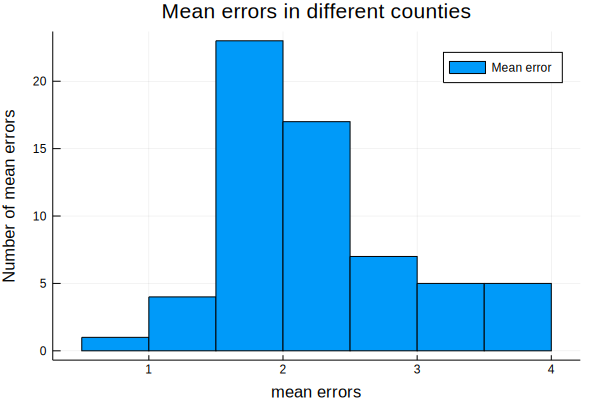

In [236]:
histogram(mean,xlabel= "mean errors", ylabel="Number of mean errors",title="Mean errors in different counties",label="Mean error")


Again, are there major outliers? How do the coefficients compare across counties?

There were less outliers than in part f when we used the same coefficients w that we used for the tompkins dataset when modeling the other county datasets. Still, compared to the Tompkins data set, the model is not as accurate when it applies to other counties. For example, when it applies to Tompkins, the mean error is approximately 0, but when it applies to other counties, the mean errors are significantly higher just from briefly appearing at the array of mean errors. The average of the mean errors is 2.2395760646905365 which is significantly larger. I define counties that have mean error larger than 3 to be outliers. In this sense, there are 10 major outliers. For example, Niagara, Herkimer, Greene, and Genesee are major outliers because they have mean errors greater than 3.

The coefficients differ significantly across counties as you can see from the new_weights array that I printed out that in each array, there are drastic changes in coefficients.

## Part H:


If I wanted to predict the income tax in each county in future years, the county-specific models would be better than the Tompkins model. You can see that when using the Tompkins model on other county datasets, the mean error ends up being significantly large, hinting that the mdoel does not perform well. At least when we do county-specific models, the mean error is less and we will be able to generate specific weight coefficients for each county in order for the models to be more accurate for each county. A concern that I have for the county-specific model is that it would take a lot of time and computer space to do this. And a concern that I have for the Tompkins model is that we did not have a covariate for geography into our model so reasonably, the avg_tax would somehow be swayed by the geographical area. Therefore, this is why we got such a large mean error when we did try to fit a model that worked for a specific county to dozens of other counties. The Tompkins model being applied to different counties would not be a good accurate representation because it is too county-specific. 

## Part I:

To make my model better, I would add a covariate like mortgages so that I can use the number of mortgages used by each civilian in a county to predict the avg_tax in the county. I think that this would be a good feature to use because reasonably if there are a lot of mortgages in an area, you can expect that there would be a higher average tax in the area. 